<a href="https://colab.research.google.com/github/lorenzomazzante/ML01/blob/main/TD11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML01 : TD10 - Kmeans Clustering

Réalisé par Cyprien Gilet et Khaled Belahcene

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 1. Génération d'une base de données simulées

Compiler la cellule ci dessous pour générer la base de données simulées pour ce TD.

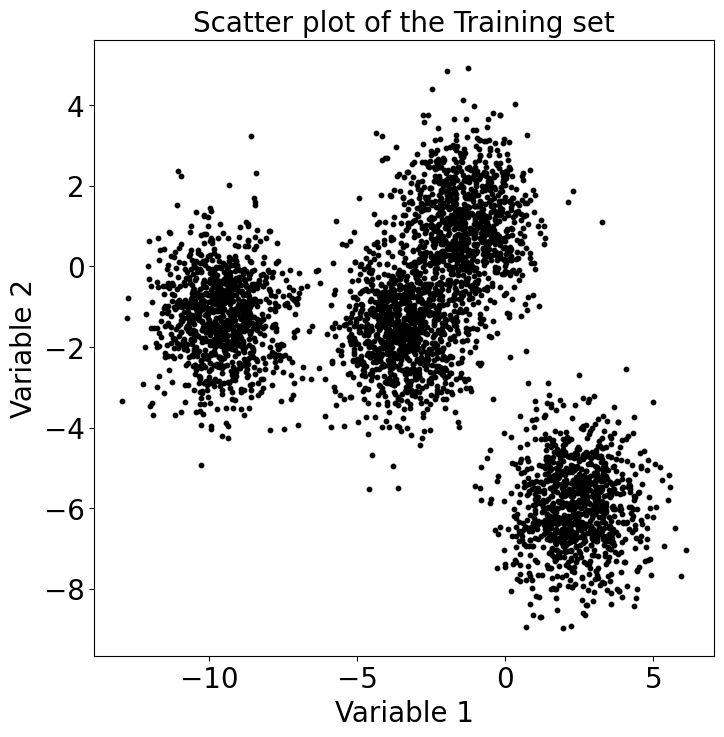

In [44]:
# Generate sample data
n = 4000
n_components = 4

X, y_true = make_blobs(n_samples=n, centers=n_components, cluster_std=1.1, random_state=2)
X = X[:, ::-1]

figScatter = plt.figure(figsize=(8,8))
ax1 = figScatter.add_subplot(1,1,1)
ax1.scatter(X[:, 0], X[:, 1], c='black', marker=".", s=40)
ax1.set_xlabel("Variable 1",fontsize=20)
ax1.set_ylabel("Variable 2",fontsize=20)
ax1.set_title("Scatter plot of the Training set",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

# 2. Implémentation de l'algorithme Kmeans

Créer une fonction "*myKmeans_fit*" permettant de calibrer l'algorithme Kmeans :
- Cette fonction prendra en entrée la base d'apprentissage $X$ ainsi que le nombre de cluster $K$ que nous souhaiterions identifier.
- À chaque iteration de l'algorithme, nous souhaiterions stocker la somme des inerties intra-classe.
- Nous souhaiterions que cette fonction fournisse les coordonnées de centroïds, les labels de chaque observation, ainsi que la convergence de la la somme des inerties intra-classe.
     

In [55]:
def myKmeans_fit(X, K):

    n  = X.shape[0]
    d = X.shape[1]
    Y = np.zeros(n)

    sum_inercie = np.inf
    sum_inercie_old = 0
    stock_inercie = []

    idx_first_centroid = np.random.choice(n, K, replace=False)
    mu = np.zeros((K, d))
    mu[:] = X[idx_first_centroid, :]


    while np.abs(sum_inercie_old - sum_inercie) > 0:

        inercie_par_classe = np.zeros(K)
        for i in range(n):
            dist_obs_centroid = np.zeros(K)
            for k in range(K):
                dist_obs_centroid[k] = np.linalg.norm(X[i, :] - mu[k, :])
            k_opt = np.argmin(dist_obs_centroid)
            Y[i] = k_opt
            inercie_par_classe[k_opt] = inercie_par_classe[k_opt] + dist_obs_centroid[k_opt]

        for k in range(K):
          mu[k,:] = np.mean(X[Y==k,:], axis=0)

        sum_inercie_old = sum_inercie
        sum_inercie = np.sum(inercie_par_classe)
        stock_inercie.append(sum_inercie)

    return Y,mu,stock_inercie

# 3. Application sur la base de données simulées avec $K=3$ clusters

Appliquer la fonction *myKmeans_fit* sur la base de données simulées pour identifier $K=3$ clusters. Afficher sur une figure :
- La figure de convergence de l'inertie intra-classe
- Le scatter-plot des observations avec les cluster identifiés et les centroïds de chaque cluster.

Refaire cette expérience avec $K=2$, $K=4$ puis $K=5$ clusters.

/tmp/ipython-input-169507867.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(X[Y==k,0], X[Y==k,1], c=cm.rainbow(k/K), marker=".", s=40)


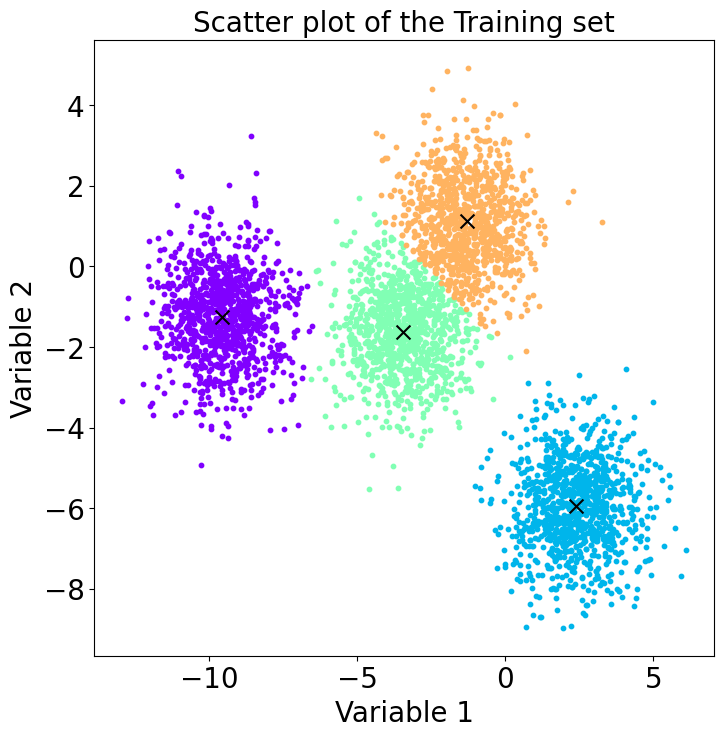

In [66]:
K = 4
Y,mu,stock_inercie = myKmeans_fit(X, K)

figScatter = plt.figure(figsize=(8,8))
ax1 = figScatter.add_subplot(1,1,1)
ax1.set_xlabel("Variable 1",fontsize=20)
ax1.set_ylabel("Variable 2",fontsize=20)
ax1.set_title("Scatter plot of the Training set",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

for k in range(K):
  ax1.scatter(X[Y==k,0], X[Y==k,1], c=cm.rainbow(k/K), marker=".", s=40)
  ax1.scatter(mu[k,0], mu[k,1], c='black', marker="x", s=100)

# 4. Choix du nombre de clusters $K$ grâce au coefficient Silhouette

Appliquer la fonction *myKmeans_fit* pour différents nombres de clusters $K$ et calculer le coefficient silhouette associé (en utilisant la fonction implémentée par Scikit-Learn).

- Afficher sur une figure l'évolution du coefficient silhouette en fonction de $K$.
- Quel est le nombre de clusters optimal par rapport à ce critère ?
- Ré-appliquer la fonction *myKmeans_fit* sur la base de données en considérant ce nombre optimal de clusters. Comme lors de la section précédente, afficher la convergence de l'algorithme, les clusters formés avec ce nombre de clusters. Afficher également les silhouettes par clusters.


In [60]:
from sklearn.metrics import silhouette_score

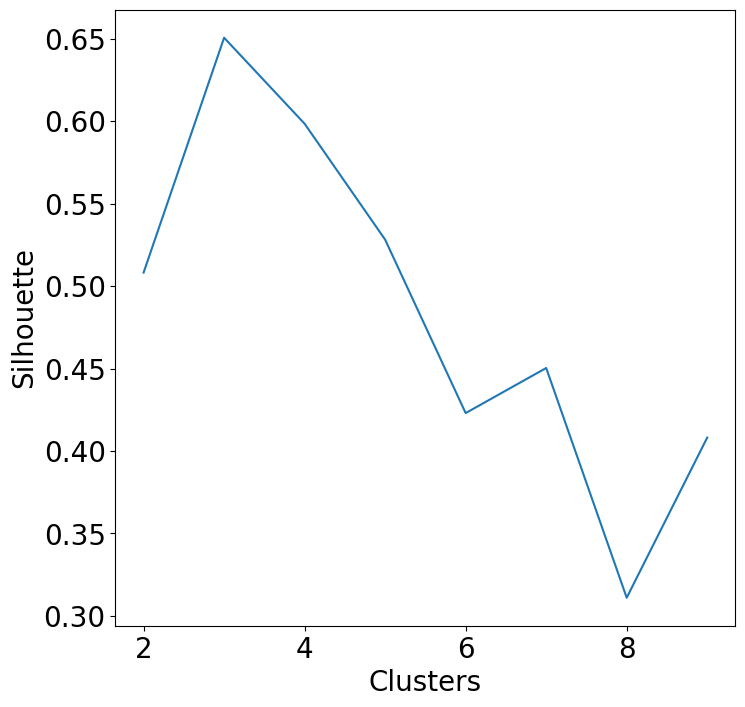

In [61]:
stock_silhouette = []

for K in range(2,10):
  Y,mu,stock_inercie = myKmeans_fit(X, K)
  stock_silhouette.append(silhouette_score(X, Y))

figScatter = plt.figure(figsize=(8,8))
ax1 = figScatter.add_subplot(1,1,1)
ax1.set_xlabel("Clusters",fontsize=20)
ax1.set_ylabel("Silhouette",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.plot(range(2,10), stock_silhouette)